## Compare Grit to perturbseq Relative Activity Score

The perturbseq data come from the CRISPRi experiment from:

> Jost, M., Santos, D.A., Saunders, R.A. et al. Titrating gene expression using libraries of systematically attenuated CRISPR guide RNAs. Nat Biotechnol 38, 355–364 (2020). https://doi.org/10.1038/s41587-019-0387-5

and relative activity is defined as:

The fold-knockdown of each mismatched variant divided by the fold-knockdown of the perfectly-matched sgRNA.

### Also, visualize singlecell-grit

In [1]:
import pathlib
import numpy as np
import pandas as pd
import plotnine as gg

In [2]:
# Load perturbseq results
perturbseq_data_dir = pathlib.Path("../../1.calculate-metrics/perturb-seq/results")
gse_id = "GSE132080"
results_file = pathlib.Path(f"{perturbseq_data_dir}/{gse_id}_grit.tsv")

output_dir = "figures"

grit_df = pd.read_csv(results_file, sep="\t")

grit_df.loc[:, "gene"] = pd.Categorical(
    grit_df.gene, categories=grit_df.gene.unique()
)

print(grit_df.shape)
grit_df.head(2)

(128, 10)


,perturbation,group,grit,id,sequence,gene,gamma_day5,gamma_day10,relative_activity_day5,relative_activity_day10
0,HSPA5_HSPA5_+_128003624.23-P1P2_01,HSPA5,27.978637,HSPA5_+_128003624.23-P1P2_01,GAACCGAGTAGGCGACGGTG,HSPA5,-0.637327,-0.374808,0.852461,0.877397
1,GATA1_GATA1_-_48645022.23-P1P2_00,GATA1,27.381778,GATA1_-_48645022.23-P1P2_00,GTGAGCTTGCCACATCCCCA,GATA1,-0.962732,-0.615306,1.000000,1.000000


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 4 x 3.5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/GSE132080_crispri_grit_relative_activity_comparison.png


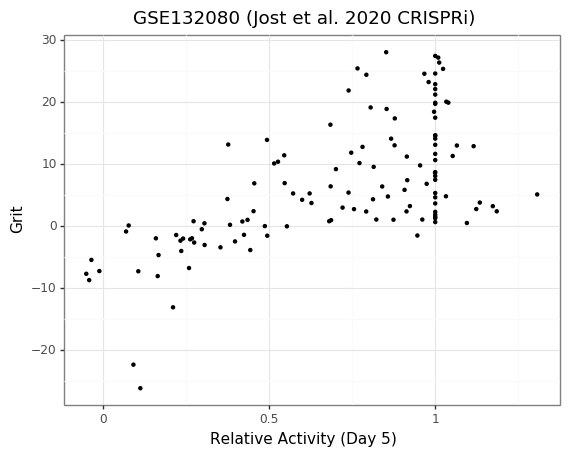

<ggplot: (403677957)>

In [3]:
# Global view
global_gg = (
    gg.ggplot(grit_df, gg.aes(x="relative_activity_day5", y="grit")) +
    gg.geom_point(size=0.8) +
    gg.theme_bw() +
    gg.xlab("Relative Activity (Day 5)") +
    gg.ylab("Grit") +
    gg.ggtitle(f"{gse_id} (Jost et al. 2020 CRISPRi)")
)

output_file = pathlib.Path(f"{output_dir}/{gse_id}_crispri_grit_relative_activity_comparison.png")
global_gg.save(output_file, dpi=500, height=3.5, width=4)

global_gg

/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/GSE132080_crispri_grit_relative_activity_comparison.png


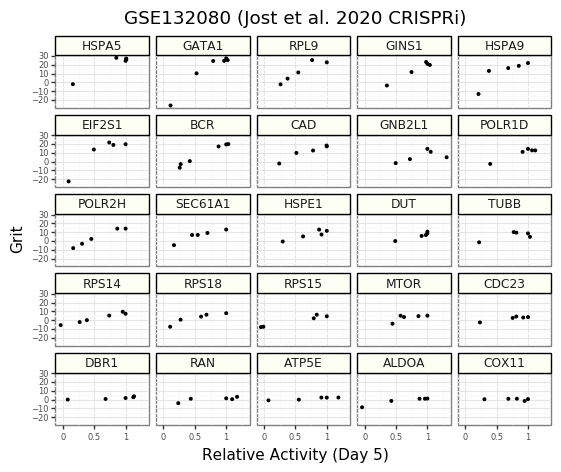

<ggplot: (405725289)>

In [4]:
gene_gg = (
    gg.ggplot(grit_df, gg.aes(x="relative_activity_day5", y="grit")) +
    gg.geom_point(size=0.6) +
    gg.theme_bw() +
    gg.xlab("Relative Activity (Day 5)") +
    gg.ylab("Grit") +
    gg.ggtitle(f"{gse_id} (Jost et al. 2020 CRISPRi)") +
    gg.facet_wrap("~gene") +
    gg.theme(
        strip_background=gg.element_rect(colour="black", fill="#fdfff4"),
        axis_text=gg.element_text(size=6)
    )
)

output_file = pathlib.Path(f"{output_dir}/{gse_id}_crispri_grit_relative_activity_comparison.png")
gene_gg.save(output_file, dpi=500, height=5, width=6)

gene_gg

## Visualize single cell grit

In [5]:
sc_results_file = pathlib.Path(f"{perturbseq_data_dir}/{gse_id}_single_cell_grit.tsv.gz")
sc_df = pd.read_csv(sc_results_file, sep="\t")

sc_df.loc[:, "gene"] = pd.Categorical(
    sc_df.gene, categories=grit_df.gene.unique()
)

sc_df.loc[:, "gene_identity"] = pd.Categorical(
    sc_df.gene_identity, categories=["neg"] + grit_df.gene.unique().tolist()
)

print(sc_df.shape)
sc_df.head()

(83105, 27)


,cell_identity,cell_barcode,guide_identity,read_count,UMI_count,coverage,gemgroup,good_coverage,number_of_cells,barcode,...,grit_gene,grit_guide,id,sequence_activity,gene,gamma_day5,gamma_day10,relative_activity_day5,relative_activity_day10,perturbation_activity
0,0,AAACCTGAGAGTAATC-1,RAN_RAN_+_131356438.23-P1P2_12,544.0,34.0,16.000000,1.0,True,1.0,AAACCTGAGAGTAATC-1,...,RAN,RAN_RAN_+_131356438.23-P1P2_12,RAN_+_131356438.23-P1P2_12,GGCGGTCGCTGCGCTTAGGT,RAN,-0.046549,-0.034259,0.235823,0.212155,RAN_RAN_+_131356438.23-P1P2_12
1,10030,ATTCTACCATGCAACT-2,RAN_RAN_+_131356438.23-P1P2_12,643.0,22.0,29.227273,2.0,True,1.0,ATTCTACCATGCAACT-2,...,RAN,RAN_RAN_+_131356438.23-P1P2_12,RAN_+_131356438.23-P1P2_12,GGCGGTCGCTGCGCTTAGGT,RAN,-0.046549,-0.034259,0.235823,0.212155,RAN_RAN_+_131356438.23-P1P2_12
2,10094,ATTTCTGCAGGTCGTC-2,RAN_RAN_+_131356438.23-P1P2_12,694.0,37.0,18.756757,2.0,True,1.0,ATTTCTGCAGGTCGTC-2,...,RAN,RAN_RAN_+_131356438.23-P1P2_12,RAN_+_131356438.23-P1P2_12,GGCGGTCGCTGCGCTTAGGT,RAN,-0.046549,-0.034259,0.235823,0.212155,RAN_RAN_+_131356438.23-P1P2_12
3,10164,CAAGATCAGGTTACCT-2,RAN_RAN_+_131356438.23-P1P2_12,317.0,12.0,26.416667,2.0,True,2.0,CAAGATCAGGTTACCT-2,...,RAN,RAN_RAN_+_131356438.23-P1P2_12,RAN_+_131356438.23-P1P2_12,GGCGGTCGCTGCGCTTAGGT,RAN,-0.046549,-0.034259,0.235823,0.212155,RAN_RAN_+_131356438.23-P1P2_12
4,10280,CACAGGCCAAGGTGTG-2,RAN_RAN_+_131356438.23-P1P2_12,818.0,29.0,28.206897,2.0,True,1.0,CACAGGCCAAGGTGTG-2,...,RAN,RAN_RAN_+_131356438.23-P1P2_12,RAN_+_131356438.23-P1P2_12,GGCGGTCGCTGCGCTTAGGT,RAN,-0.046549,-0.034259,0.235823,0.212155,RAN_RAN_+_131356438.23-P1P2_12


In [6]:
sc_df.gene_identity.value_counts()

neg        62336
POLR1D      1375
DUT         1243
DBR1        1107
GNB2L1      1006
HSPE1        977
MTOR         964
RPS14        960
COX11        932
GINS1        900
RAN          875
CAD          874
BCR          869
ATP5E        832
CDC23        829
SEC61A1      828
HSPA5        745
RPS15        693
TUBB         672
RPS18        628
ALDOA        625
EIF2S1       614
RPL9         608
GATA1        577
HSPA9        542
POLR2H       494
Name: gene_identity, dtype: int64

/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/GSE132080_singlecell_crispri_grit_relative_activity_comparison.png


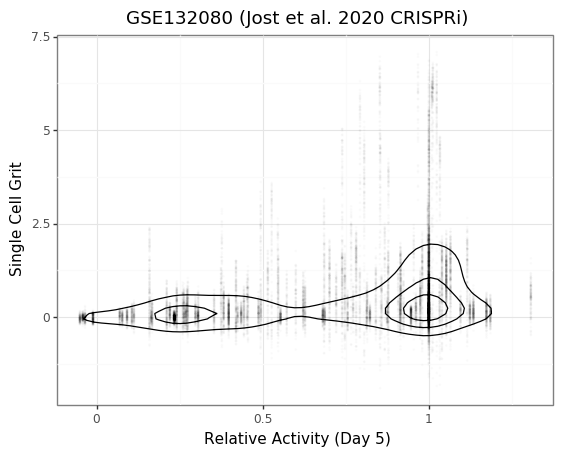

<ggplot: (407850093)>

In [7]:
global_gg = (
    gg.ggplot(sc_df.dropna(subset=["gene"]), gg.aes(x="relative_activity_day5", y="grit")) +
    gg.geom_density_2d() +
    gg.geom_point(size=0.2, alpha=0.01) +
    gg.theme_bw() +
    gg.xlab("Relative Activity (Day 5)") +
    gg.ylab("Single Cell Grit") +
    gg.ggtitle(f"{gse_id} (Jost et al. 2020 CRISPRi)")
)

output_file = pathlib.Path(f"{output_dir}/{gse_id}_singlecell_crispri_grit_relative_activity_comparison.png")
global_gg.save(output_file, dpi=500, height=5, width=6)

global_gg

/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/GSE132080_singlecell_by_gene_crispri_grit_relative_activity_comparison.png


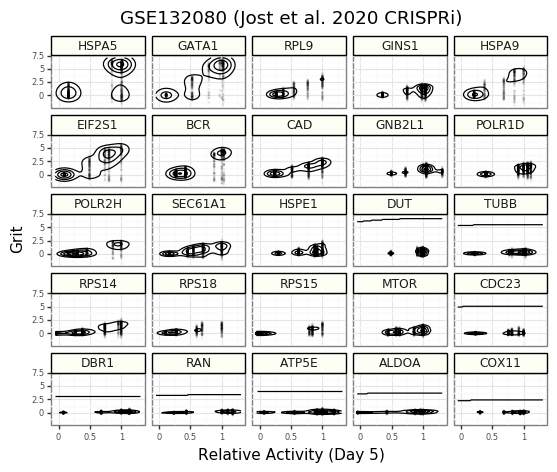

<ggplot: (405163797)>

In [8]:
gene_gg = (
    gg.ggplot(sc_df.dropna(subset=["gene"]), gg.aes(x="relative_activity_day5", y="grit")) +
    gg.geom_density_2d() +
    gg.geom_point(alpha=0.05, size=0.1) +
    gg.theme_bw() +
    gg.xlab("Relative Activity (Day 5)") +
    gg.ylab("Grit") +
    gg.ggtitle(f"{gse_id} (Jost et al. 2020 CRISPRi)") +
    gg.facet_wrap("~gene") +
    gg.theme(
        strip_background=gg.element_rect(colour="black", fill="#fdfff4"),
        axis_text=gg.element_text(size=6)
    )
)

output_file = pathlib.Path(
    f"{output_dir}/{gse_id}_singlecell_by_gene_crispri_grit_relative_activity_comparison.png"
)
gene_gg.save(output_file, dpi=500, height=5, width=6)

gene_gg

/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/GSE132080_singlecell_umap_grit.png


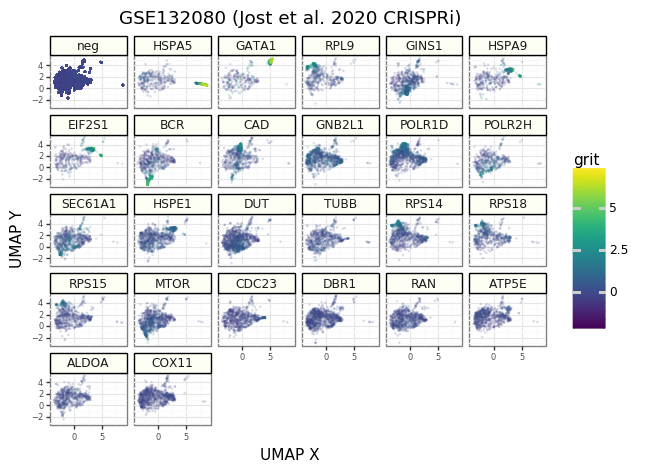

<ggplot: (409982717)>

In [9]:
umap_gg = (
    gg.ggplot(sc_df, gg.aes(x="umap_0", y="umap_1")) +
    gg.geom_point(gg.aes(color="grit"), alpha=0.2, size=1, stroke=0) +
    gg.facet_wrap("~gene_identity") +
    gg.theme_bw() +
    gg.xlab("UMAP X") +
    gg.ylab("UMAP Y") +
    gg.ggtitle(f"{gse_id} (Jost et al. 2020 CRISPRi)") +
    gg.theme(
        strip_background=gg.element_rect(colour="black", fill="#fdfff4"),
        axis_text=gg.element_text(size=6)
    )
)

output_file = pathlib.Path(f"{output_dir}/{gse_id}_singlecell_umap_grit.png")
umap_gg.save(output_file, dpi=500, height=5, width=6)

umap_gg

/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_RAN_singlecell_umap_grit.png


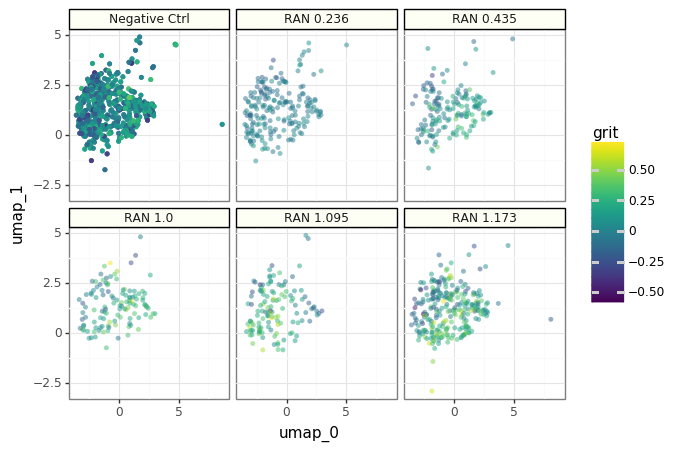

<ggplot: (410104953)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_POLR2H_singlecell_umap_grit.png


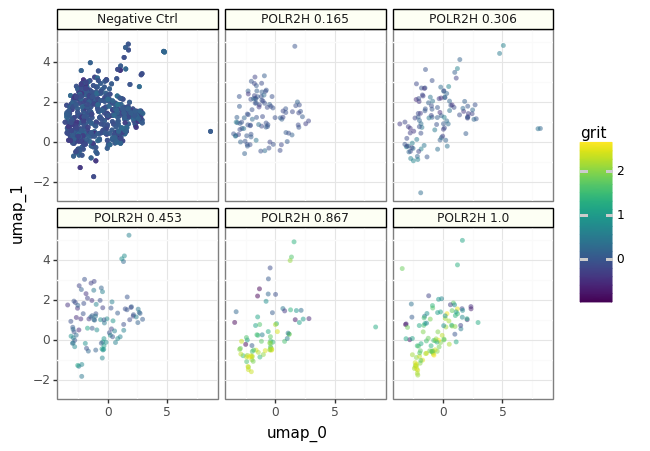

<ggplot: (406051969)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_TUBB_singlecell_umap_grit.png


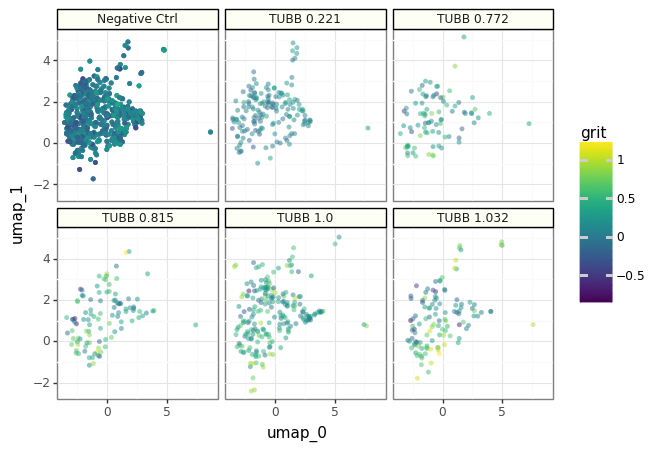

<ggplot: (408077577)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_CDC23_singlecell_umap_grit.png


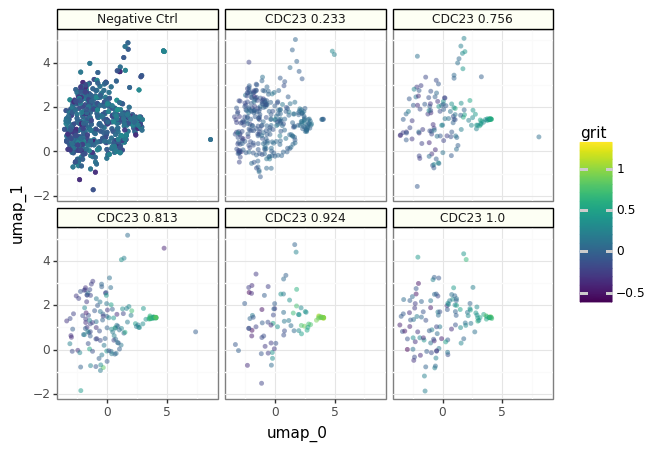

<ggplot: (408454405)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_POLR1D_singlecell_umap_grit.png


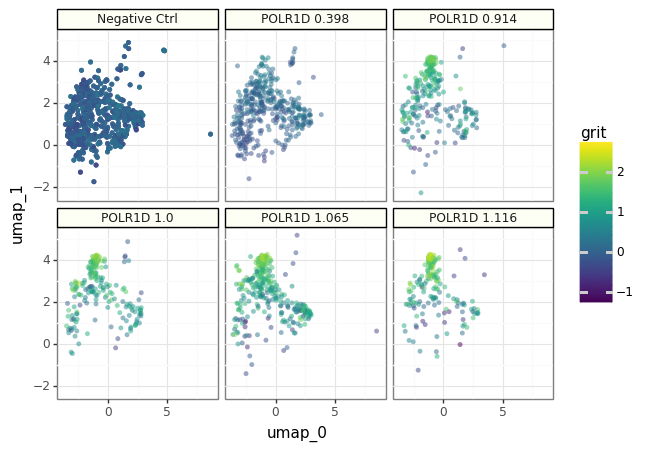

<ggplot: (405876713)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_DUT_singlecell_umap_grit.png


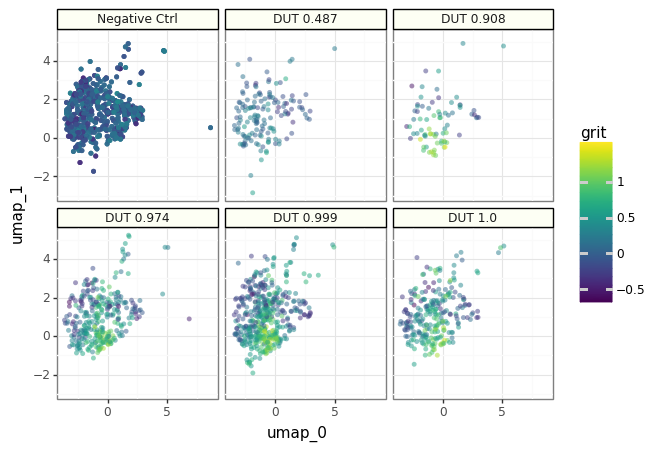

<ggplot: (408172885)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_HSPA5_singlecell_umap_grit.png


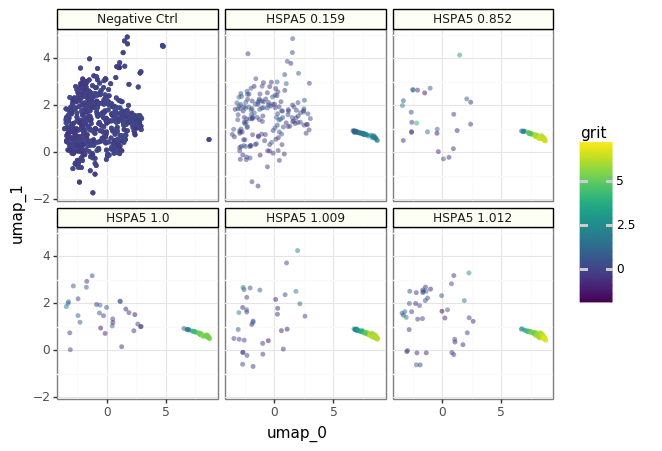

<ggplot: (404216973)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_MTOR_singlecell_umap_grit.png


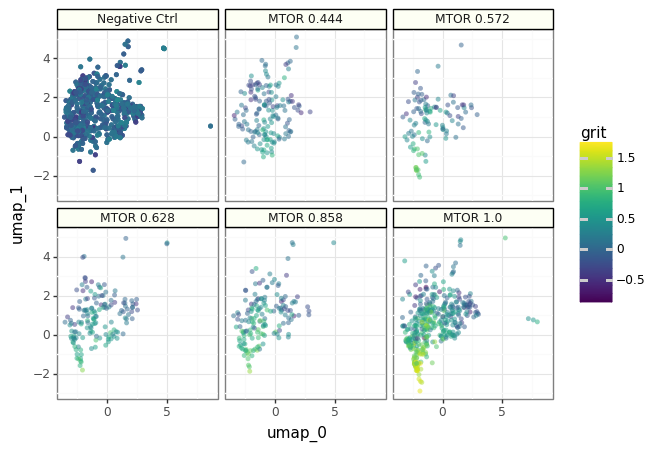

<ggplot: (405317401)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_GATA1_singlecell_umap_grit.png


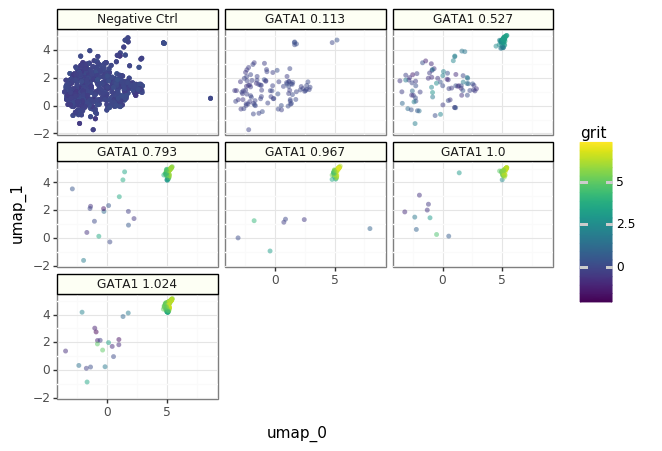

<ggplot: (405356833)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_GINS1_singlecell_umap_grit.png


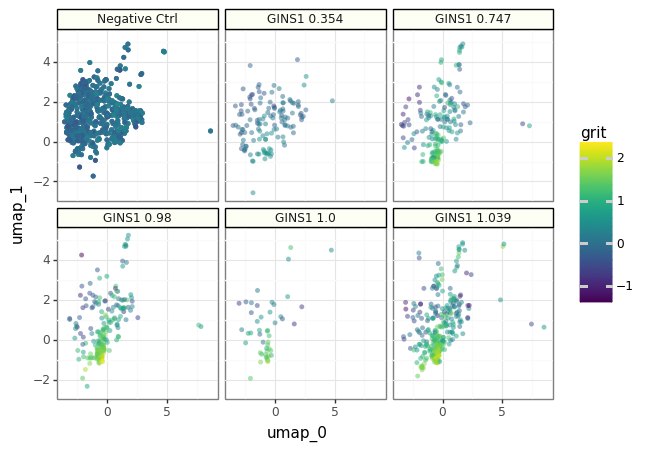

<ggplot: (403839429)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_HSPE1_singlecell_umap_grit.png


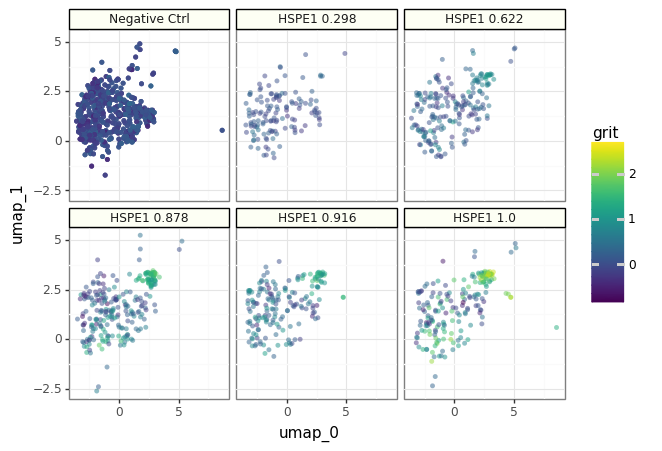

<ggplot: (410176837)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_RPS14_singlecell_umap_grit.png


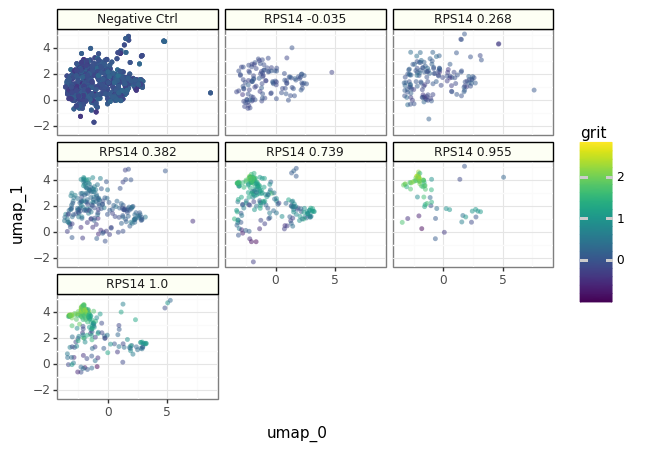

<ggplot: (410106745)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_EIF2S1_singlecell_umap_grit.png


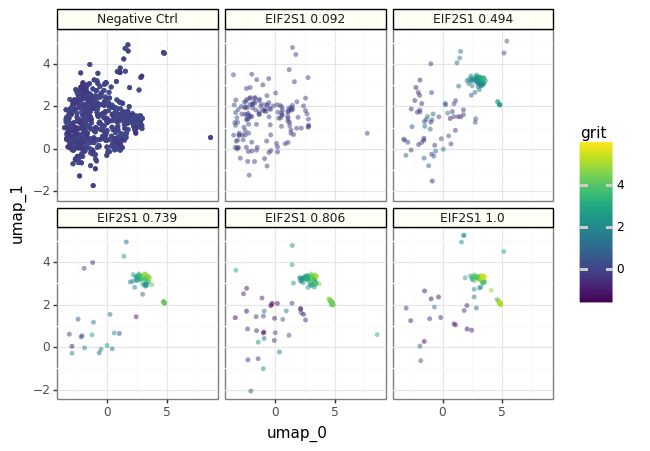

<ggplot: (405839585)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_DBR1_singlecell_umap_grit.png


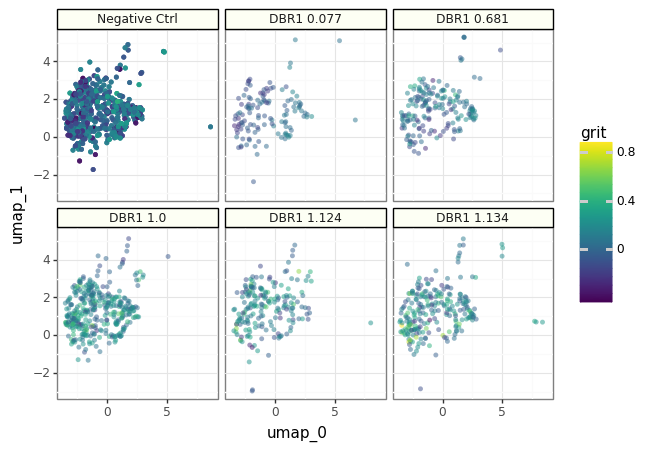

<ggplot: (407972453)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_CAD_singlecell_umap_grit.png


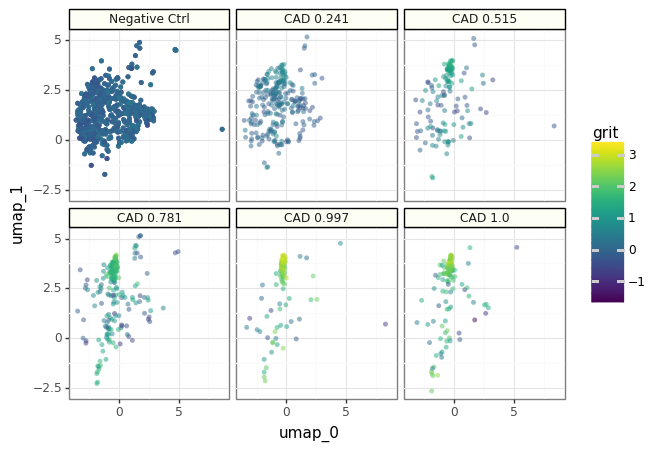

<ggplot: (410062085)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_SEC61A1_singlecell_umap_grit.png


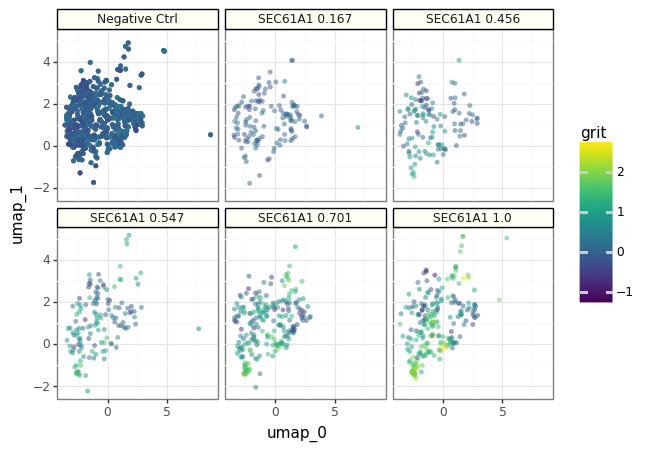

<ggplot: (405725005)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_RPL9_singlecell_umap_grit.png


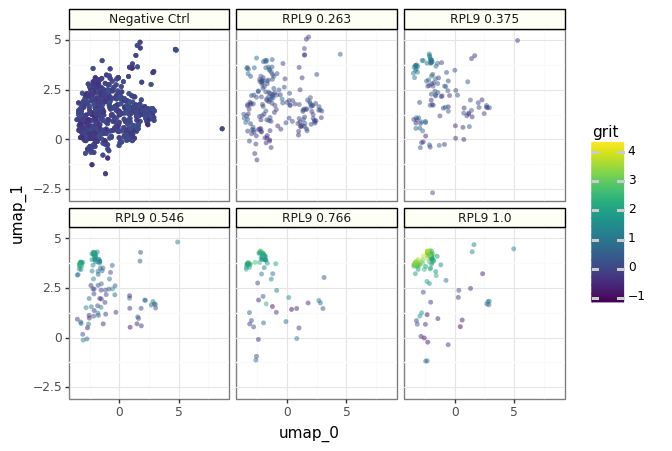

<ggplot: (410553801)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_HSPA9_singlecell_umap_grit.png


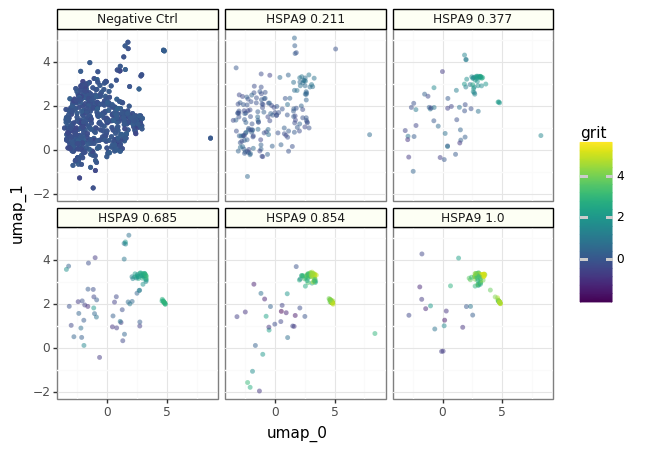

<ggplot: (405132781)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_RPS18_singlecell_umap_grit.png


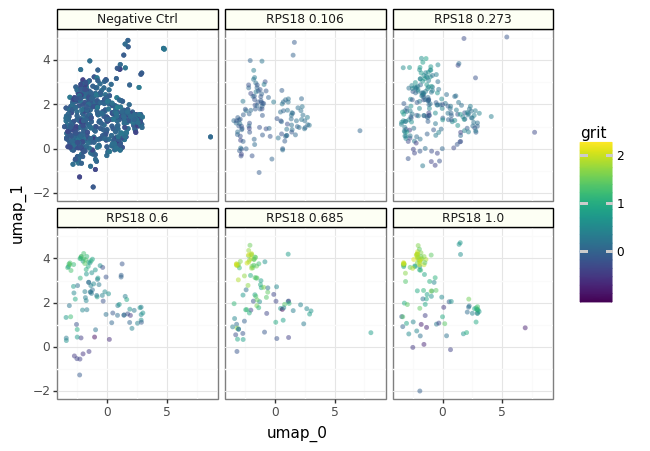

<ggplot: (405332765)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_ALDOA_singlecell_umap_grit.png


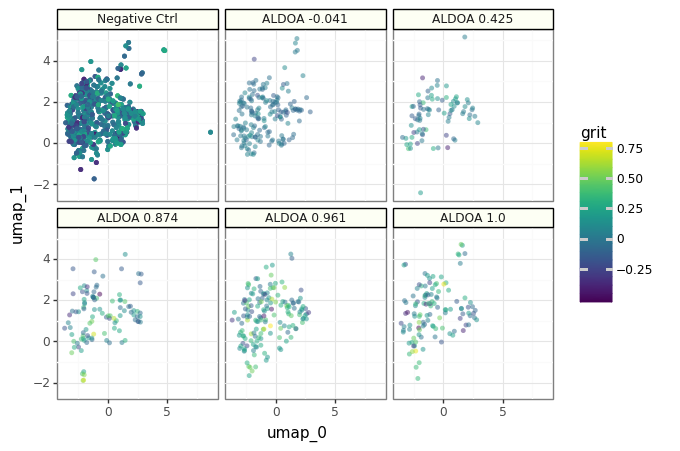

<ggplot: (405305341)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_RPS15_singlecell_umap_grit.png


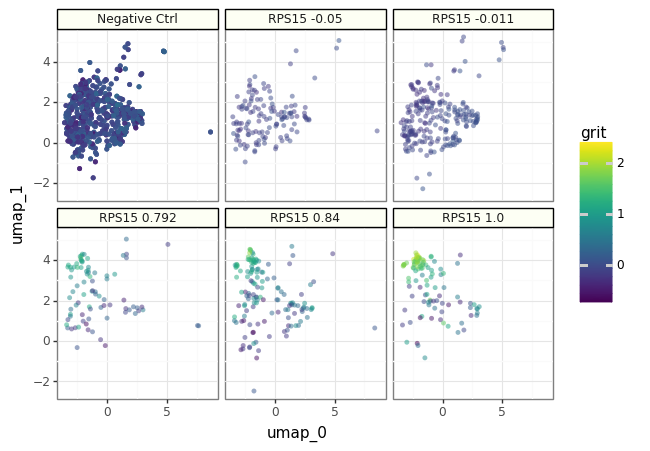

<ggplot: (403963873)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_ATP5E_singlecell_umap_grit.png


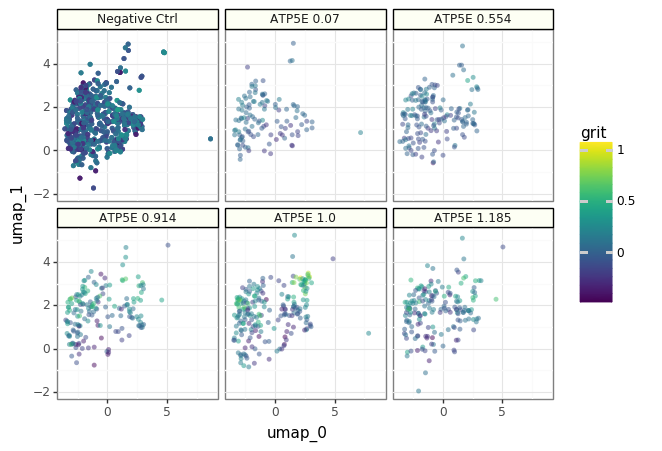

<ggplot: (409105981)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_COX11_singlecell_umap_grit.png


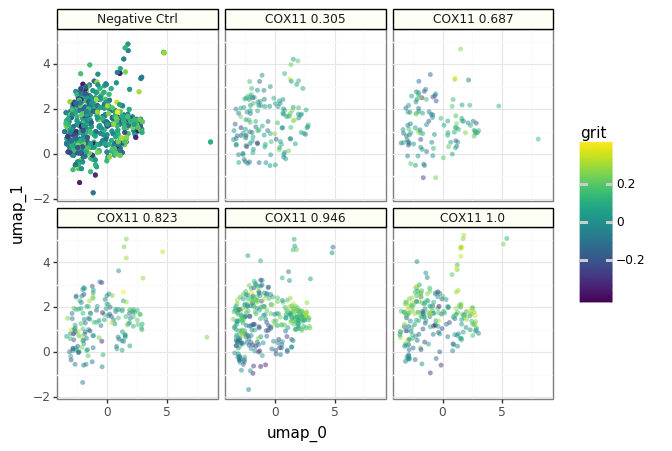

<ggplot: (408555437)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_BCR_singlecell_umap_grit.png


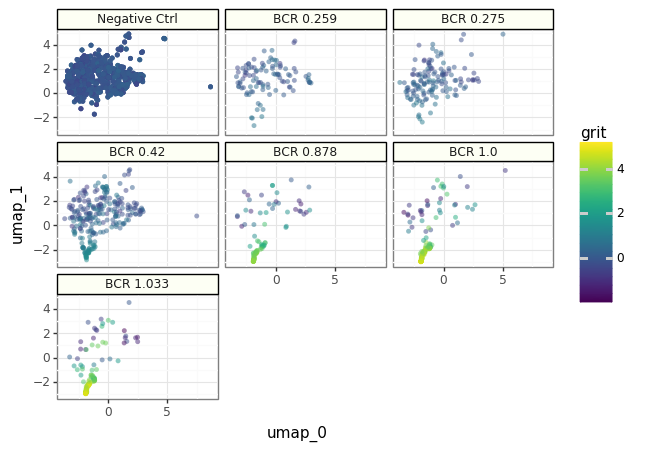

<ggplot: (403951657)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_GNB2L1_singlecell_umap_grit.png


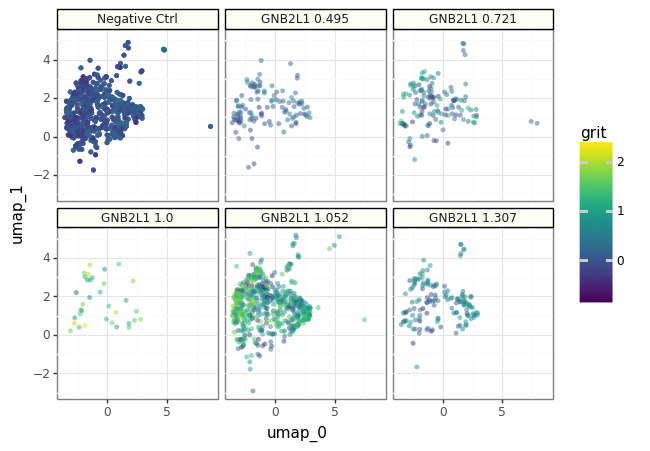

<ggplot: (410124741)>


In [10]:
for gene in sc_df.gene.unique():
    if gene in ["neg", "*", "nan", np.nan]:
        continue
    
    gene_embedding_df = sc_df.query("grit_gene == @gene")

    gene_embedding_df = (
        gene_embedding_df
        .assign(
            grit_facet_label=(
                gene_embedding_df.grit_gene + " " + gene_embedding_df.relative_activity_day5.round(3).astype(str)
            )
        )
    )
    gene_embedding_df.loc[gene_embedding_df.gene_identity == "neg", "grit_facet_label"] = "Negative Ctrl"

    facet_order = ["Negative Ctrl"] + [
        f"{gene_embedding_df.grit_gene.unique()[0]} "+ str(x) 
        for x in sorted(gene_embedding_df.relative_activity_day5.dropna().unique().round(3))
    ]
    
    gene_embedding_df.loc[:, "grit_facet_label"] = pd.Categorical(
        gene_embedding_df.grit_facet_label, categories=facet_order
    )
        
    gene_gg = (
        gg.ggplot(gene_embedding_df.dropna(subset=["grit_facet_label"]), gg.aes(x="umap_0", y="umap_1")) +
        gg.geom_point(gg.aes(color="grit"), size=2, stroke=0, alpha=0.5) +
        gg.facet_wrap("~grit_facet_label") +
        gg.theme_bw() +
        gg.theme(
            strip_background=gg.element_rect(colour="black", fill="#fdfff4")
        )
    )
    
    output_file = pathlib.Path(f"{output_dir}/gene_umaps/{gse_id}_{gene}_singlecell_umap_grit.png")
    gene_gg.save(output_file, dpi=500, height=5, width=6)

    print(gene_gg)